In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [24]:
beer = pd.read_table('beer.txt', sep=" ")

In [26]:
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [27]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      20 non-null     object 
 1   calories  20 non-null     int64  
 2   sodium    20 non-null     int64  
 3   alcohol   20 non-null     float64
 4   cost      20 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 928.0+ bytes


In [48]:
beer.describe()

,calories,sodium,alcohol,cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.550000,14.950000,4.240000,0.494500
std,30.283702,6.581273,1.087924,0.144858
min,68.000000,6.000000,0.900000,0.280000
25%,110.250000,9.500000,4.175000,0.427500
50%,144.000000,15.000000,4.600000,0.435000
75%,150.250000,19.000000,4.900000,0.485000
max,175.000000,27.000000,5.500000,0.790000


In [62]:
beer_num_names = [i for i in dict(beer.dtypes) if dict(beer.dtypes)[i] in ['float64', 'int64']]
beer_cat_names = [i for i in dict(beer.dtypes) if dict(beer.dtypes)[i] in ['object']]

In [63]:
beer_num_names

['calories', 'sodium', 'alcohol', 'cost']

In [65]:
beer_cat_names

['name']

In [73]:
beer_num = beer[beer_num_names]
beer_cat = beer[beer_cat_names]

In [74]:
beer_num.describe()

,calories,sodium,alcohol,cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.550000,14.950000,4.240000,0.494500
std,30.283702,6.581273,1.087924,0.144858
min,68.000000,6.000000,0.900000,0.280000
25%,110.250000,9.500000,4.175000,0.427500
50%,144.000000,15.000000,4.600000,0.435000
75%,150.250000,19.000000,4.900000,0.485000
max,175.000000,27.000000,5.500000,0.790000


In [60]:
def outlier_treat(x):
    x = x.clip(upper = x.quantile(0.99),lower = x.quantile(0.01))
    return x

In [86]:
beer_num = beer_num.apply(outlier_treat)

In [87]:
beer_num.describe()

,calories,sodium,alcohol,cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.540500,14.921500,4.250450,0.495260
std,30.129246,6.527358,1.042247,0.143024
min,68.760000,6.000000,1.166000,0.299000
25%,110.250000,9.500000,4.175000,0.427500
50%,144.000000,15.000000,4.600000,0.435000
75%,150.250000,19.000000,4.900000,0.485000
max,174.050000,26.430000,5.443000,0.786200


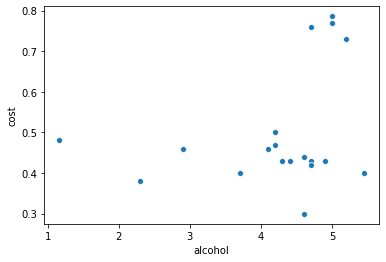

In [88]:
sns.scatterplot(x='alcohol', y='cost', data=beer_num)

In [75]:
beer['cost'].quantile(0.99)


0.7862

In [76]:
beer['alcohol'].quantile(0.1)

2.84

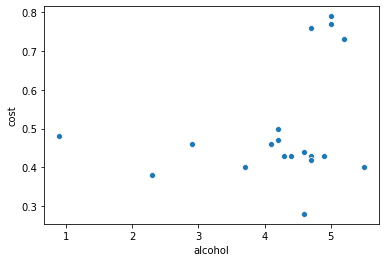

In [47]:
sns.scatterplot(x='alcohol', y='cost', data=beer)

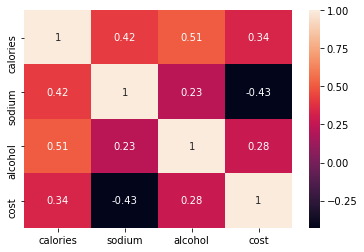

In [97]:
sns.heatmap(beer_num.corr(), annot=True)

### Standardise Data

In [85]:
sc = StandardScaler()

In [91]:
beer_scaled = sc.fit_transform(beer_num)

In [95]:
pd.DataFrame(beer_scaled).head()

,0,1,2,3
0,0.390225,0.012339,0.442533,-0.468140
1,0.628593,0.641064,0.639411,-0.468140
2,0.832909,0.012339,-3.036304,-0.109467
3,1.275592,-1.245111,0.934728,1.683899
4,0.662646,-0.616386,0.737850,1.970837


In [96]:
pd.DataFrame(beer_scaled).describe()

,0,1,2,3
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-2.997602e-16,-2.220446e-17,-1.561945e-15,-2.373102e-16
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-2.171890e+00,-1.402293e+00,-3.036304e+00,-1.407864e+00
25%,-7.590489e-01,-8.521582e-01,-7.427228e-02,-4.860739e-01
50%,3.902255e-01,1.233873e-02,3.440938e-01,-4.322729e-01
75%,6.030541e-01,6.410638e-01,6.394110e-01,-7.359974e-02
max,1.413505e+00,1.808921e+00,1.173935e+00,2.087048e+00


### PCA

In [100]:
pc = PCA(n_components = 4)

In [101]:
pc.fit(beer_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [214]:
#Eigen values
pc.explained_variance_

array([1.92652567, 1.50758331, 0.55414944, 0.22226789])

In [123]:
#The amount of variance that each PC explains
pc.explained_variance_ratio_

array([0.45754985, 0.35805104, 0.13161049, 0.05278862])

In [136]:
#Cumulative Variance explains
#np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
np.round(pc.explained_variance_ratio_.cumsum(), decimals=4)*100

array([ 45.75,  81.56,  94.72, 100.  ])

### Number of components have choosen as 2 based on cumulative variacne is explaining >75 % and individual component explaining >0.8 variance.

In [117]:
pca = PCA(n_components = 2)

In [115]:
pc_fit = pc_final.fit(beer_scaled)

In [147]:
pca_scaled = pca.fit_transform(beer_scaled)

In [120]:
pca_col = pd.DataFrame(data = pca_scaled, columns = ['PC1', 'PC2'])

In [121]:
pca_col.head()

,PC1,PC2
0,-0.393100,-0.318848
1,-0.887598,-0.742120
2,1.297004,-0.327002
3,-1.453537,2.119606
4,-1.231683,1.887520


### K-Means

In [158]:
# calculate silhouette_score for K=2 through K=12
sc = []
k_range = range(2, 10)
for i in k_range:
    km = KMeans(n_clusters=i, random_state=123)
    km.fit(pca_col)
    sc.append(metrics.silhouette_score(pca_col, km.labels_))

In [180]:
sc

[0.4062986967645088,
 0.5828888375482315,
 0.5457744064843,
 0.48602084121697037,
 0.4439111429124304,
 0.4075682809924187,
 0.3731177769067034,
 0.3640772078793327]

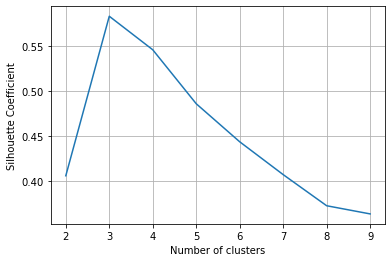

In [160]:
# plot the results
plt.plot(k_range, sc)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### As 3 has the highest SC score,3 segment solution is best.

### Elbow Method

In [161]:
k_range = range(2, 10)
wcss = []
for k in k_range:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=123)
    
    # Fit model to samples
    model.fit(pca_col)
    
    # Append the inertia to the list of inertias
    wcss.append(model.inertia_)

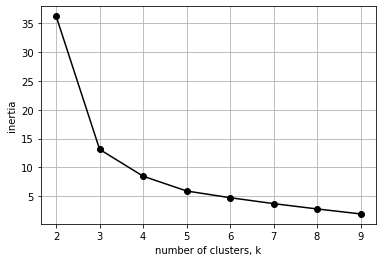

In [166]:
plt.plot(k_range, wcss, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid(True)

### From both method, we came to conclude to take K as 3

In [183]:
k_mean_final = KMeans(n_clusters=4, random_state= 43)

In [189]:
k_mean_final.fit(pca_col)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=43, tol=0.0001, verbose=0)

In [215]:
k_mean_final.cluster_centers_

array([[-1.25898811,  1.86737469],
       [-0.82618475, -1.07604772],
       [ 2.77013049,  0.00525423],
       [ 1.01752824,  0.18806243]])

In [201]:
labels = pd.Series(k_mean_final.labels_, name = 'Segment_label')

In [204]:
beer_seg = pd.concat([beer,pca_col,labels], axis=1)

In [205]:
beer_seg.head()

,name,calories,sodium,alcohol,cost,PC1,PC2,Segment_label
0,Budweiser,144,15,4.7,0.43,-0.393100,-0.318848,1
1,Schlitz,151,19,4.9,0.43,-0.887598,-0.742120,1
2,Lowenbrau,157,15,0.9,0.48,1.297004,-0.327002,3
3,Kronenbourg,170,7,5.2,0.73,-1.453537,2.119606,0
4,Heineken,152,11,5.0,0.77,-1.231683,1.887520,0


Text(0.5, 1.0, 'Clusters by K-Means')

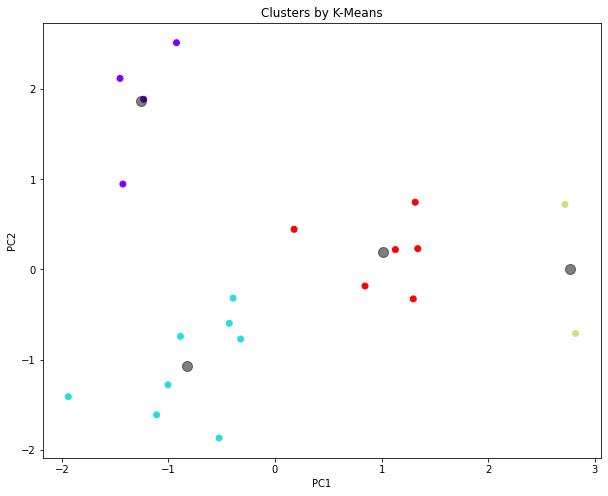

In [226]:
plt.figure(figsize= (10,8))
plt.scatter(x=beer_seg['PC1'], y=beer_seg['PC2'], c=beer_seg['Segment_label'], cmap = 'rainbow')
plt.scatter(k_mean_final.cluster_centers_[:, 0], k_mean_final.cluster_centers_[:, 1], s=100, c='black',alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters by K-Means')